In [40]:
library(randomForest)
library(tidyverse)

In [41]:
require(ISLR)

In [42]:
books <- read.csv(
  "books.csv",header = TRUE, stringsAsFactors = FALSE
)

In [43]:
names(books)

[1] "bookID"             "title"              "authors"           
 [4] "average_rating"     "isbn"               "isbn13"            
 [7] "language_code"      "num_pages"          "ratings_count"     
[10] "text_reviews_count" "publication_date"   "publisher"

In [44]:
head(books)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPrÃ©,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPrÃ©,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,4,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
4,5,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPrÃ©,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
6,9,Unauthorized Harry Potter Book Seven News: Half-Blood Prince Analysis and Speculation,W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books


In [45]:
myvars <- names(books) %in% c('bookID','title','authors','isbn', 'isbn13','language_code','publication_date','publisher')

In [46]:
new_books <- books[!myvars]

In [57]:
summary(new_books)

 average_rating      num_pages         ratings_count     text_reviews_count
 Length:11131       Length:11131       Min.   :      0   Min.   :    0.0   
 Class :character   Class :character   1st Qu.:    104   1st Qu.:    9.0   
 Mode  :character   Mode  :character   Median :    745   Median :   47.0   
                                       Mean   :  17936   Mean   :  541.9   
                                       3rd Qu.:   4994   3rd Qu.:  237.5   
                                       Max.   :4597666   Max.   :94265.0   
                                       NA's   :4         NA's   :4         

In [58]:
the_books <- as.new_books.frame(sapply(the_books, as.numeric))

ERROR: Error in as.new_books.frame(sapply(the_books, as.numeric)): could not find function "as.new_books.frame"


In [49]:
new_books %>% select_if(is.numeric)

ratings_count,text_reviews_count
<int>,<int>
2095690,27591
2153167,29221
6333,244
2339585,36325
41428,164
19,1
28242,808
3628,254
249558,4080


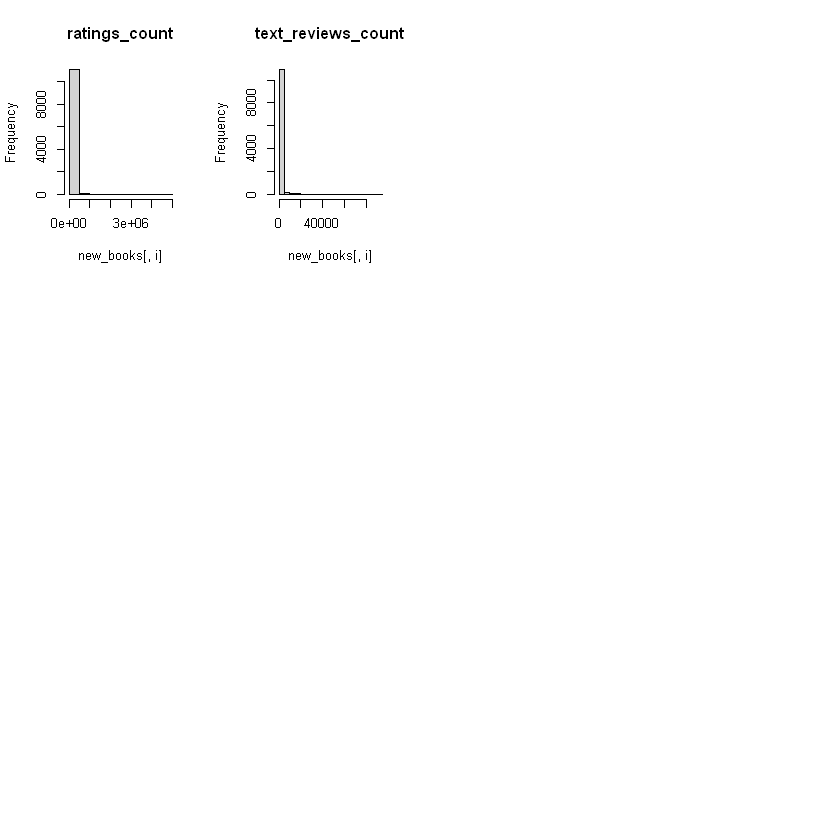

In [50]:
par(mfrow=c(3, 4))
for(i in 3:4) {
    hist(new_books[,i], main=names(new_books)[i])
}

par(mfrow=c(1,8))
for(i in 1:8) {
    boxplot(books[,i], main=names(books)[i])
}

In [51]:
library(Amelia)
library(mlbench)

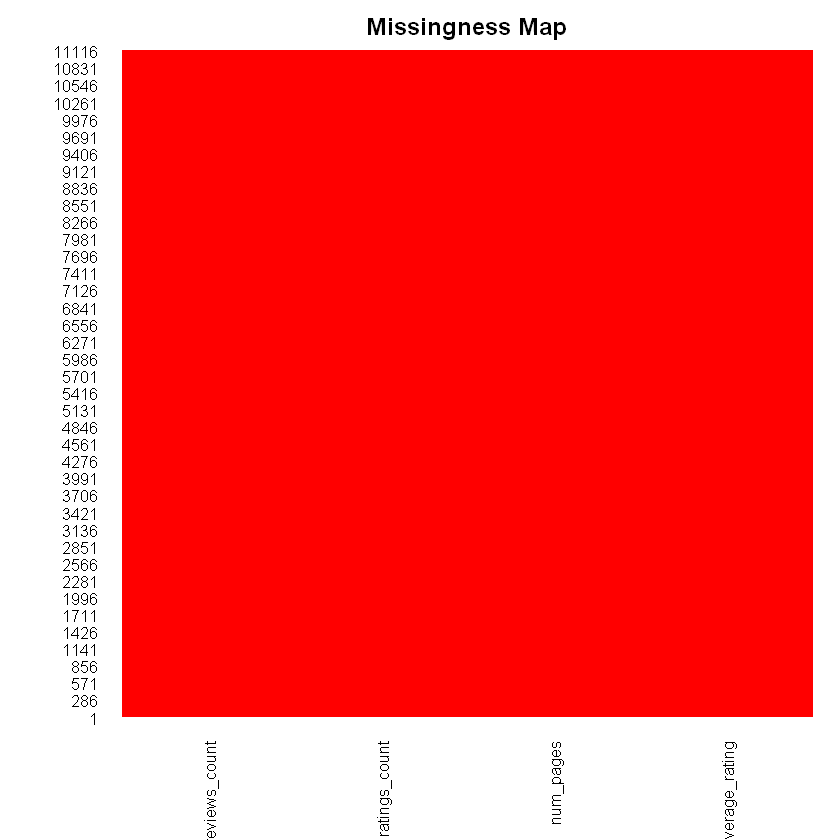

In [52]:
missmap(new_books, col=c("blue", "red"), legend=FALSE)

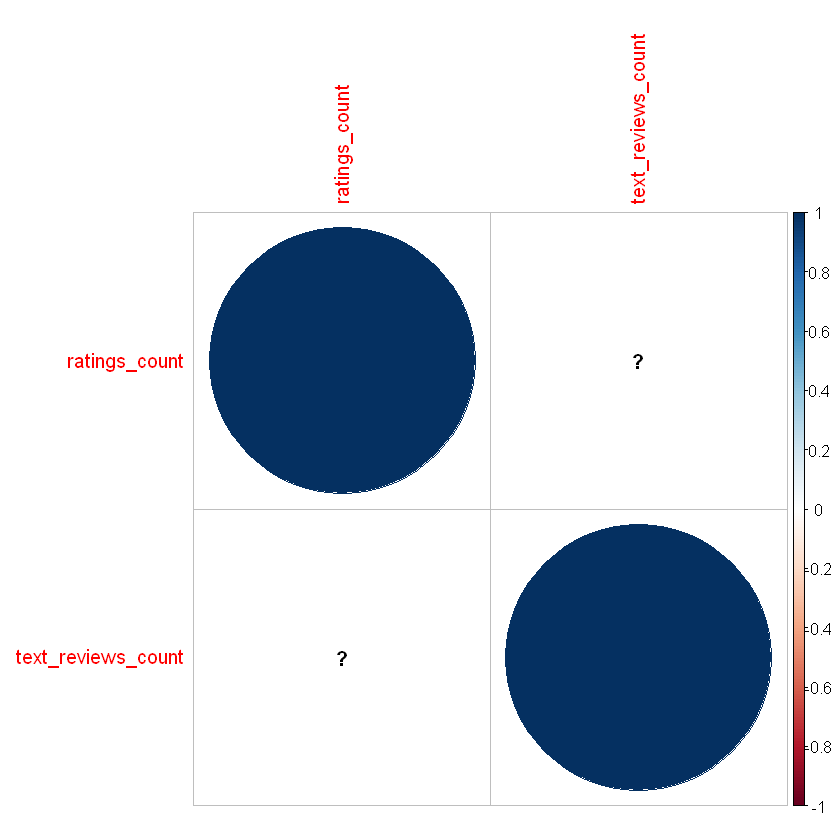

In [53]:
library(corrplot)
correlations <- cor(new_books[,3:4])
corrplot(correlations, method="circle")

In [54]:
library(caret)

In [55]:
x <- new_books[,3:4]
y <- new_books[,1]
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

NULL

In [56]:
glm.fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Smarket, family = binomial)